# Business Perspective: To predict the price of Cars

- **We will drop Manufacturer,Model,Minprice,MaxPrice as we are just predicting the price based on technical specifications and not on brand**

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to display all the columns/features

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#importing the dataset and drooping useless column

df = pd.read_csv('car_sales.csv')
df = df.drop('Unnamed: 0',1)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Numerical Features-Min.Price	Price	Max.Price	MPG.city	MPG.highwayCylinders	EngineSize	Horsepower	RPM	Rev.per.mile	Man.trans.avail	Fuel.tank.capacity	Passengers	Length	Wheelbase	Width	Turn.circle	Rear.seat.room

Categorical features-Manufacturer, Model, Type, AirBags,DriveTrain, Origin, Make

In [4]:
#Lets see the shape of df(row,column)

df.shape

(93, 27)

In [5]:
#Checking the datatype 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64


In [6]:
#Checking the correlation

df.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [7]:
#Let us see the summary statistics

df.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


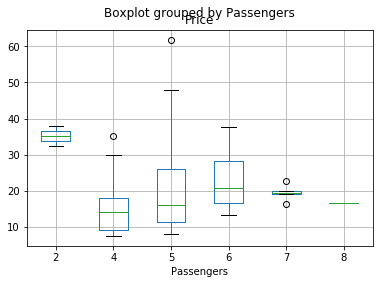

In [8]:
#Box plot is the best way to see categorical variables

df.boxplot(column='Price',by='Passengers')

- Two seater car is expensive than 4 seater car

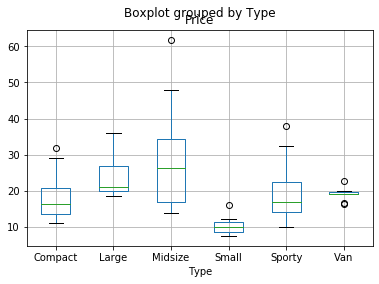

In [9]:
df.boxplot(column='Price',by='Type')

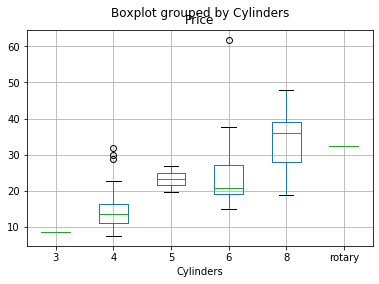

In [10]:
df.boxplot(column='Price',by='Cylinders')

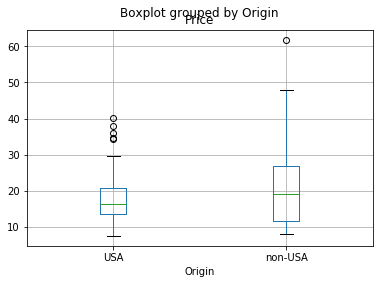

In [11]:
df.boxplot(column='Price',by='Origin')

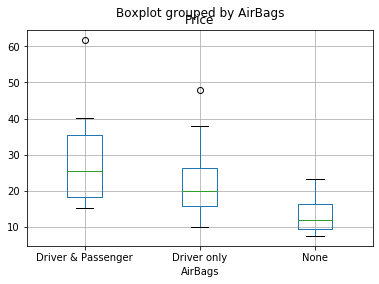

In [12]:
df.boxplot(column='Price',by='AirBags')

- This is a linear relationship

In [13]:
df['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

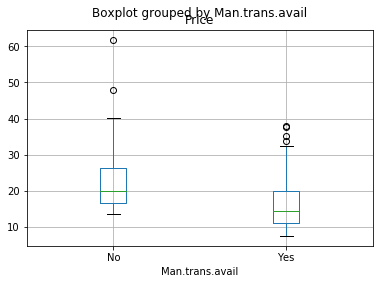

In [14]:
df.boxplot(column='Price',by='Man.trans.avail')

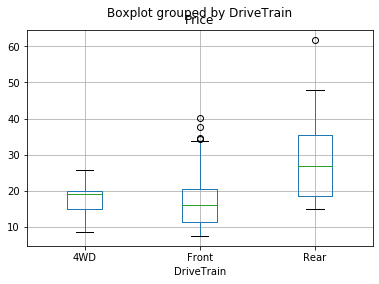

In [15]:
df.boxplot(column='Price',by='DriveTrain')

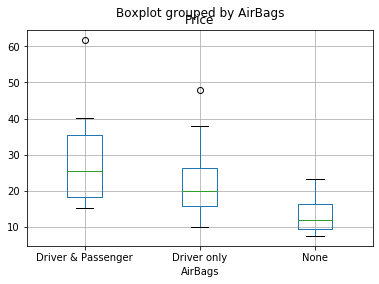

In [16]:
df.boxplot(column='Price',by='AirBags')

# Data Preprocessing

### 1.Checking for Missing values and imputing them

In [17]:
#Checking missing values

df.isna().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

- **We can see we have missing values in two features.**

- **If working with larger datasets(30k,40k) we can gow ith dropna**
- **If dataset is small(few hundred) go for imputation- median, resampling, knn**

In [18]:
#Using median imputer

df['Rear.seat.room'].fillna(df['Rear.seat.room'].median(),inplace=True)
df['Luggage.room'].fillna(df['Luggage.room'].median(),inplace=True)

### 2.Encoding Categorical Variables

In [19]:
#Create a df1 data frame by dropping unwanted columns based on business context
#Dropping extraneous columns

df1=df.drop(['Manufacturer','Model','Min.Price','Max.Price','Make'],axis=1)
df1.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [20]:
#Create dummy columns to categorical columns

df1_Type=pd.get_dummies(df1['Type'],drop_first=True)
df1_airbags=pd.get_dummies(df1['AirBags'],drop_first=True)
df1_DT=pd.get_dummies(df1['DriveTrain'],drop_first=True)
df1_cyl=pd.get_dummies(df1['Cylinders'],drop_first=True)
df1_pas=pd.get_dummies(df1['Passengers'],drop_first=True)
df1_update=pd.concat([df1,df1_Type,df1_airbags,df1_DT,df1_cyl,df1_pas],axis=1)
df1_update.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Large,Midsize,Small,Sporty,Van,Driver only,None,Front,Rear,4,5,6,8,rotary,4,5,6,7,8
0,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0
1,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
3,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0


In [21]:
#Mapping 0 and 1 

df1_update['Origin']=df1_update['Origin'].replace({'USA': 0, 'non-USA': 1})
df1_update['Man.trans.avail']=df1_update['Man.trans.avail'].replace({'Yes': 0, 'No': 1})

In [22]:
df1_update.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Large,Midsize,Small,Sporty,Van,Driver only,None,Front,Rear,4,5,6,8,rotary,4,5,6,7,8
0,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0
1,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
3,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0


In [23]:
#Dropping original variables as they are already encoded

df2=df1_update.drop(['Type','AirBags','DriveTrain','Cylinders','Passengers'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 36 columns):
Price                 93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null int64
Fuel.tank.capacity    93 non-null float64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64
Rear.seat.room        93 non-null float64
Luggage.room          93 non-null float64
Weight                93 non-null int64
Origin                93 non-null int64
Large                 93 non-null uint8
Midsize               93 non-null uint8
Small                 93 non-null uint8
Sporty                93 non-null uint8
Van                   93 non-null uint8
Driver 

# Building Statistical Model

In [24]:
#Splitting into X and y

y=df2['Price']
X=df2.drop('Price',axis=1)

In [25]:
#Building OLS model

import statsmodels.api as sm

Xc = sm.add_constant(X)
model = sm.OLS(y,Xc).fit()
model.summary()

C:\Users\Avish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     10.06
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           2.77e-14
Time:                        09:58:46   Log-Likelihood:                -252.59
No. Observations:                  93   AIC:                             575.2
Df Residuals:                      58   BIC:                             663.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                108.8614     35.918      3.031      0.004      36.964     180.759
MPG.city              -0.3244      0.432     -0.750      0.456      -1.190       0.541
MPG.highway            0.1691      0.398      0.425      0.672      -0.627       0.965
EngineSize            -1.6774      2.828     -0.593      0.555      -7.337       3.983
Horsepower             0.1388      0.045      3.088      0.003       0.049       0.229
RPM                   -0.0026      0.002     -1.169      0.247      -0.007       0.002
Rev.per.mile           0.0017      0.002      0.771      0.444      -0.003       0.006
Man.trans.avail        1.9656      2.167      0.907      0.368      -2.372       6.303
Fuel.tank.capacity     0.4672      0.540      0.865      0.391      -0.614       1.549
Length                 0.0485      0.110      0.443      0.660      -0.171       0.268
Wheelbase              0.3850      0.274      1.407      0.165      -0.163       0.933
Width                 -1.9087      0.544     -3.511      0.001      -2.997      -0.820
Turn.circle           -0.6224      0.365     -1.703      0.094      -1.354       0.109
Rear.seat.room         0.3343      0.359      0.932      0.355      -0.384       1.053
Luggage.room           0.2737      0.339      0.808      0.423      -0.405       0.952
Weight                -0.0013      0.006     -0.237      0.813      -0.013       0.010
Origin                 0.8789      1.641      0.536      0.594      -2.406       4.164
Large                  1.5368      4.227      0.364      0.718      -6.925       9.999
Midsize                3.9322      2.457      1.601      0.115      -0.986       8.850
Small                  1.1903      2.657      0.448      0.656      -4.129       6.509
Sporty                 6.5059      3.371      1.930      0.059      -0.242      13.254
Van                    3.6835      7.196      0.512      0.611     -10.722      18.089
Driver only           -3.7364      1.897     -1.970      0.054      -7.533       0.060
None                  -8.3008      2.181     -3.806      0.000     -12.666      -3.936
Front                  2.2805      2.297      0.993      0.325      -2.318       6.879
Rear                   7.2573      2.915      2.490      0.016       1.423      13.092
4                     -2.1621      4.446     -0.486      0.629     -11.061       6.737
5                     -3.5966      6.722     -0.535      0.595     -17.052       9.859
6                      0.8184      5.614      0.146      0.885     -10.419      12.056
8                      3.4500      6.832      0.505      0.616     -10.226      17.126
rotary               -15.0831     12.735     -1.184      0.241     -40.576      10.410
4                     -5.4956      7.065     -0.778      0.440     -19.638       8.646
5                     -2.3710      7.4

- **We can see many features have p-values which are greater than 0.05. So we can apply backward elimination and keep those features that are less than 0.05 or significant**

In [26]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Horsepower', 'Fuel.tank.capacity', 'Wheelbase', 'Width', 'Midsize', 'Driver only', 'None', 'Rear']


In [27]:
X_new=X[selected_features]
X_new.head()

,Horsepower,Fuel.tank.capacity,Wheelbase,Width,Midsize,Driver only,None,Rear
0,140,13.2,102,68,0,0,1,0
1,200,18.0,115,71,1,0,0,0
2,172,16.9,102,67,0,1,0,0
3,172,21.1,106,70,1,0,0,0
4,208,21.1,109,69,1,1,0,1


In [28]:
#Again building Ols model using selected features
X_new_c=sm.add_constant(X_new)

model2=sm.OLS(y,X_new_c).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     40.08
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           1.51e-25
Time:                        09:58:47   Log-Likelihood:                -269.27
No. Observations:                  93   AIC:                             556.5
Df Residuals:                      84   BIC:                             579.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 45.2793     13.385      3.383      0.001      18.662      71.897
Horsepower             0.1137      0.015      7.468      0.000       0.083       0.144
Fuel.tank.capacity     0.6133      0.305      2.011      0.047       0.007       1.220
Wheelbase              0.4644      0.135      3.430      0.001       0.195       0.734
Width                 -1.4171      0.268     -5.283      0.000      -1.951      -0.884
Midsize                2.8692      1.244      2.307      0.024       0.396       5.342
Driver only           -3.3025      1.435     -2.301      0.024      -6.157      -0.448
None                  -6.1950      1.680     -3.687      0.000      -9.536      -2.854
Rear                   4.6664      1.420      3.286      0.001       1.842       7.491
==============================================================================
Omnibus:                       25.799   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.756
Skew:                           0.968   Prob(JB):                     6.41e-14
Kurtosis:                       6.454   Cond. No.                     5.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **R2 value = 80% which is quite good**

# Building Model using various Algorithms

### Gradient Boosting Regressor

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor,RandomForestRegressor,VotingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [30]:
#Customized gridsearch

GB_bias = []
GB_ve = []

for n in np.arange(1,200):
    GB = GradientBoostingRegressor(n_estimators = n,random_state = 0)
    scores = cross_val_score(GB,X_new,y,cv = 3,scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(np.abs(scores))
    GB_bias.append(np.mean(rmse))
    GB_ve.append(np.std(rmse,ddof = 1))

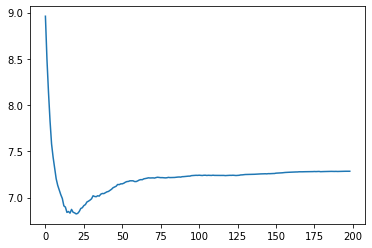

In [31]:
x_axis = np.arange(len(GB_bias))
plt.plot(x_axis,GB_bias)

In [32]:
#global minima
np.argmin(GB_bias)

20

In [33]:
#variance error at minima
GB_ve[20]

2.4182653777287064

In [34]:
np.min(GB_bias),np.argmin(GB_bias), GB_ve[20]

(6.823551447799616, 20, 2.4182653777287064)

In [35]:
#should we do this part??
np.min(GB_ve),np.argmin(GB_ve), GB_bias[63]

(2.3871038136448086, 63, 7.193323665888392)

- **20 is our global minima**
- **This means 21 is our n_estimator when we build our GB model again**
- **We have to take n+1 because of the order starts from 0**

### Adaboost Regressor

In [36]:
AB_bias = []

for n in np.arange(1,150):
    AB = AdaBoostRegressor(n_estimators = n,random_state = 0)
    score = cross_val_score(AB,X_new,y,cv = 3,scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(np.abs(scores))
    AB_bias.append(np.mean(rmse))
    
    #why we are not finding variance error?

In [37]:
LR=LinearRegression()

### Adaboost Regressor with LR

In [38]:
ABLR_bias=[]

for n in np.arange(1,150):
    ABLR=AdaBoostRegressor(base_estimator=LR,n_estimators=n,random_state=0)
    scores=cross_val_score(ABLR,X_new,y,cv=3,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(scores))
    ABLR_bias.append(np.mean(rmse))


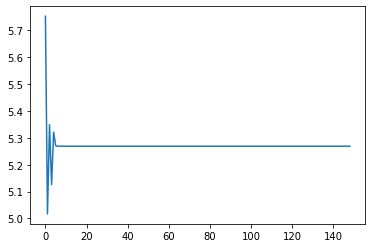

In [39]:
x_axis=np.arange(len(ABLR_bias))
plt.plot(x_axis,ABLR_bias)

In [40]:
np.argmin(ABLR_bias), ABLR_bias[1]

(1, 5.0169910308069126)

### Bagging Regressor

In [41]:
Bag_bias=[]
Bag_var=[]
for n in np.arange(1,100):
    Bag=BaggingRegressor(base_estimator=LR,n_estimators=n,random_state=0)  #default base estimator is DT
    scores=cross_val_score(Bag,X_new,y,cv=3,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(scores))
    Bag_bias.append(np.mean(rmse))
    Bag_var.append(np.std(rmse,ddof=1))


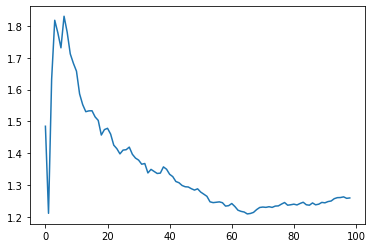

In [42]:
#Goal of bagging is to reduce variance error so use variance

x_axis=np.arange(len(Bag_var))
plt.plot(x_axis,Bag_var)

In [43]:
np.min(Bag_var),np.argmin(Bag_var),Bag_bias[65]

(1.2098213738610497, 65, 5.066870261496944)

- **We will take n_estimator = 66 because of n+1**

In [44]:
np.min(Bag_bias),np.argmin(Bag_bias),Bag_var[58]   #So n_estimator is to be decided with line 101 or line 72???
                                                    #I think we should go with np.argmin(Bag_var) because goal of bagging is to reduce variance error

(5.06040613750513, 59, 1.2343403738412047)

### Random Forest Regressor

In [45]:
RF_bias=[]
RF_var=[]
for n in np.arange(1,100):
    RF=RandomForestRegressor(criterion='mse',n_estimators=n,random_state=0)
    scores=cross_val_score(RF,X_new,y,cv=3,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(scores))
    RF_bias.append(np.mean(rmse))
    RF_var.append(np.std(rmse,ddof=1))


In [46]:
np.argmin(RF_bias),np.min(RF_bias),RF_var[16]

(16, 6.467985691917096, 1.7117565188821138)

- **We will take n_estimator = 17 because of n+1**

In [47]:
np.argmin(RF_var),np.min(RF_var), RF_bias[0]

(0, 0.10822328150850018, 7.92132947373297)

### Combining all the Models

In [48]:
LR=LinearRegression()
LR_bag=BaggingRegressor(base_estimator=LR,n_estimators=66,random_state=0)
LR_AB=AdaBoostRegressor(base_estimator=LR,n_estimators=2,random_state=0)
DT_AB=AdaBoostRegressor(n_estimators=26,random_state=0)
LR_GB=GradientBoostingRegressor(n_estimators=21,random_state=0)
RF=RandomForestRegressor(criterion='mse',n_estimators=17,random_state=0)
stacked = VotingRegressor(estimators = [('Bagged_LR',LR_bag),('LR', LR), ('LR_Boost', LR_AB)])


In [49]:
models = []
models.append(('LinearRegression', LR))
models.append(('BaggedLR',LR_bag))
models.append(('Adaboost',LR_AB))
models.append(('DT_boost',DT_AB))
models.append(('GBoost',LR_GB))
models.append(('RF',RF))
models.append(('Stacked',stacked))


LinearRegression: 5.065193 (0.994298)
BaggedLR: 5.054594 (1.037053)
Adaboost: 5.545694 (0.658176)
DT_boost: 5.897469 (1.145747)
GBoost: 6.131843 (1.691020)
RF: 6.003087 (2.016787)
Stacked: 5.113888 (0.903309)


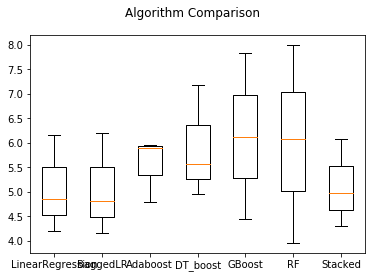

In [50]:
# evaluate each model in turn
from sklearn.model_selection import KFold,cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(model, X_new, y,cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- **We can see that in terms of least bias error,Bagged_LR is the best performing model**
- **In terms of least variance error,Adaboost is performing the best.**
- **We can use VotingRegressor using LR,Adaboost and Bagged_LR as they are performing the best as mentioned above**
- **Now we will decide if we want to go for Stacked or LR OR Adaboost or Bagged_LR**

In [51]:
#BaggedLR: 5.054594 (1.037053)
#Adaboost: 5.545694 (0.658176)
#Stacked: 5.113888 (0.903309)

In [52]:
#variance error 
(0.903309-0.658176)/0.903309

0.27137225467697107

- **Adaboost has 27% better variance error than Stacked**

In [53]:
#bias error
(5.545694-5.113888)/5.545694

0.07786329357515938

- **However bias error is 7.7% high than stacked model**

## Finally we can go for Adaboost model
- **Our business interpretation is our average error is $5540 (bias error) with +- $650(variance error)**